In [65]:
# load the Package

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
#read .csv file

df_raw = pd.read_csv("cd_data_July_2021.csv")
print (df_raw.shape)
df_raw.head()

(10000, 53)


,_d_diff_ref_rend_provider,_d_more_than_one_cpt_per_claim_per_day,admission_date,age_of_patient_at_service,benefits_assignment_certification_indicator,billing_provider,billing_provider_city,billing_provider_postal_code,claim_creation_date,claim_filing_indicator_code,claim_frequency_type_code,claim_level_charge_amount,claim_submitter_id,clia_number,condition_code,days_to_claim_submission,diagnosis_count,discharge_date,drug_code_category,drug_quantity,facility_code_value,line_item_charge_amount,line_item_id,modifiers_count,ordering_provider,other_insured_group,other_payer1,other_payer2,other_subscriber1_prsn,other_subscriber2_prsn,pat_MRN,pat_relationship_wt_insured,patient_Gender,patient_PostalCode,patient_StateProvinceCode,patient_city,payer_city,payer_name,payer_postal_code,payer_state_province_code,principalDx_CCSR_Category1,prior_authorization_number,proc_hcpcs_category,procedure_modifier,referring_provider,related_causes_code,rendering_provider,service_date,service_unit_quantity,subscriber_policy_type,subscriber_prsn,supervising_provider,denialFlag
0,0,0,NaN,52.0,Y,billing_provider_0,city_92,postal_code_1050,2018-11-30,MC,1,77.68,6423,14356,NaN,5,1,NaN,Vaccine_Viral_-Influenza_A_and_B,1.0,11,44.6,6423_1,0,ordering_provider_5,NaN,NaN,NaN,NaN,NaN,11412.0,NaN,F,postal_code_765,state_15,city_92,city_16,payer_80,postal_code_98,state_15,FAC016,NaN,immunization_administration_for_vaccines/toxoids,NaN,referring_provider_4,NaN,rendering_provider_4,2018-11-25,1,NaN,P,NaN,1
1,0,0,NaN,29.0,Y,billing_provider_1,city_92,postal_code_638,2019-05-15,MC,1,382.30,17247,14356,NaN,102,4,NaN,NaN,NaN,22,133.2,17247_2,0,ordering_provider_12,NaN,NaN,NaN,NaN,NaN,13292.0,NaN,M,postal_code_1509,state_15,city_65,city_16,payer_3,postal_code_98,state_15,GEN002,NaN,Hospital_observation_services,NaN,referring_provider_4,NaN,rendering_provider_4,2019-02-03,1,NaN,P,NaN,1
2,0,0,NaN,79.0,Y,billing_provider_0,city_92,postal_code_1050,2018-07-26,MB,1,187.00,14405,14356,NaN,2,1,NaN,NaN,NaN,11,187.0,14405_1,0,ordering_provider_10,NaN,payer_53,NaN,S,NaN,13356.0,NaN,M,postal_code_407,state_15,city_71,city_41,payer_31,postal_code_54,state_1,DIG010,NaN,Office/other_outpatient_services,NaN,referring_provider_9,NaN,rendering_provider_9,2018-07-24,1,NaN,P,NaN,1
3,0,0,NaN,18.0,Y,billing_provider_0,city_92,postal_code_1412,2019-06-12,MC,1,115.00,20401,14356,NaN,3,1,NaN,NaN,NaN,11,115.0,20401_1,0,ordering_provider_5,NaN,NaN,NaN,NaN,NaN,11407.0,NaN,M,postal_code_1132,state_15,city_92,city_16,payer_3,postal_code_98,state_15,INJ041,NaN,Office/other_outpatient_services,NaN,referring_provider_4,NaN,rendering_provider_4,2019-06-09,1,NaN,P,NaN,1
4,0,0,NaN,81.0,Y,billing_provider_0,city_92,postal_code_1050,2018-02-07,MB,1,91.80,7157,14356,NaN,13,2,NaN,NaN,NaN,11,91.8,7157_1,0,ordering_provider_4,NaN,NaN,NaN,NaN,NaN,13946.0,NaN,F,postal_code_406,state_15,city_92,city_41,payer_31,postal_code_54,state_1,FAC008,NaN,Office/other_outpatient_services,NaN,referring_provider_3,NaN,rendering_provider_3,2018-01-25,1,NaN,P,NaN,1


In [64]:
prof = ProfileReport(df_raw)
prof.to_file(output_file='output.html')

In [3]:
# function to find the missing value percentage in dataframe

def missing_zero_values_table(df):
#         zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [4]:
missing_zero_values_table(df_raw)


Your selected dataframe has 53 columns and 10000 Rows.
There are 20 columns that have missing values.


,Missing Values,% of Total Values,Data Type
prior_authorization_number,9982,99.8,float64
supervising_provider,9978,99.8,object
condition_code,9977,99.8,object
other_insured_group,9963,99.6,object
other_payer2,9957,99.6,object
other_subscriber2_prsn,9957,99.6,object
subscriber_policy_type,9952,99.5,float64
discharge_date,9810,98.1,object
pat_relationship_wt_insured,9805,98.0,object
related_causes_code,9760,97.6,object


### Explicit type conversion

In [5]:
intTypeList =["age_of_patient_at_service",
                "claim_level_charge_amount",
                "days_to_claim_submission",
                "diagnosis_count",
                "drug_quantity",
                "line_item_charge_amount",
                "modifiers_count",
                "service_unit_quantity"]

dataTypeList = ["admission_date",
                "claim_creation_date",
                "discharge_date",
                "service_date"]

strTypeList = ["billing_provider",
                "billing_provider_city",
                "billing_provider_postal_code",
                "claim_submitter_id",
                "clia_number",
                "line_item_id",
                "ordering_provider",
                "pat_MRN",
                "patient_StateProvinceCode",
                "patient_city",
                "payer_city",
                "payer_name",
                "payer_postal_code",
                "payer_state_province_code",
                "prior_authorization_number",
                "referring_provider",
                "rendering_provider",
                "supervising_provider",
                "_d_diff_ref_rend_provider",
                "_d_more_than_one_cpt_per_claim_per_day",
                "benefits_assignment_certification_indicator",
                "claim_filing_indicator_code",
                "claim_frequency_type_code",
                "condition_code",
                "drug_code_category",
                "facility_code_value",
                "other_insured_group",
                "other_payer1",
                "other_payer2",
                "other_subscriber1_prsn",
                "other_subscriber2_prsn",
                "pat_relationship_wt_insured",
                "patient_Gender",
                "patient_PostalCode",
                "principalDx_CCSR_Category1",
                "proc_hcpcs_category",
                "procedure_modifier",
                "related_causes_code",
                "subscriber_policy_type",
                "subscriber_prsn",
                "denialFlag"
                ]
df_raw[intTypeList] = df_raw[intTypeList].apply(pd.to_numeric, errors='coerce')
df_raw[strTypeList] = df_raw[strTypeList].astype(object)

for i in range(len(dataTypeList)):
    df_raw[dataTypeList[i]] = pd.to_datetime(df_raw[dataTypeList[i]], format="%Y-%m-%d")


In [6]:
missing_zero_values_table(df_raw)


Your selected dataframe has 53 columns and 10000 Rows.
There are 20 columns that have missing values.


,Missing Values,% of Total Values,Data Type
prior_authorization_number,9982,99.8,object
supervising_provider,9978,99.8,object
condition_code,9977,99.8,object
other_insured_group,9963,99.6,object
other_payer2,9957,99.6,object
other_subscriber2_prsn,9957,99.6,object
subscriber_policy_type,9952,99.5,object
discharge_date,9810,98.1,datetime64[ns]
pat_relationship_wt_insured,9805,98.0,object
related_causes_code,9760,97.6,object


In [7]:
# Delete columns containing either 80% or more than 80% NaN Values
perc = 75
min_count =  int(((100-perc)/100)*df_raw.shape[0] + 1)
mod_df = df_raw.dropna( axis=1, thresh=min_count)
mod_df.shape

(10000, 39)

### Integer Analysis

In [71]:
temp = list(set(intTypeList).difference(set(mod_df.columns.tolist())))
# print (temp)
for i in range(len(temp)):
    intTypeList.remove(temp[i])
    
int_df = mod_df[intTypeList]
print (int_df.shape)
int_df.head()

(10000, 7)


,age_of_patient_at_service,claim_level_charge_amount,days_to_claim_submission,diagnosis_count,line_item_charge_amount,modifiers_count,service_unit_quantity
0,52.0,77.68,5,1,44.6,0,1
1,29.0,382.30,102,4,133.2,0,1
2,79.0,187.00,2,1,187.0,0,1
3,18.0,115.00,3,1,115.0,0,1
4,81.0,91.80,13,2,91.8,0,1


In [72]:
# check the missing value
missing_zero_values_table(int_df)
# int_df["age_of_patient_Group_customize"].isna().sum()

Your selected dataframe has 7 columns and 10000 Rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Type


In [73]:
int_df.head()

,age_of_patient_at_service,claim_level_charge_amount,days_to_claim_submission,diagnosis_count,line_item_charge_amount,modifiers_count,service_unit_quantity
0,52.0,77.68,5,1,44.6,0,1
1,29.0,382.30,102,4,133.2,0,1
2,79.0,187.00,2,1,187.0,0,1
3,18.0,115.00,3,1,115.0,0,1
4,81.0,91.80,13,2,91.8,0,1


In [74]:
int_df.describe()

,age_of_patient_at_service,claim_level_charge_amount,days_to_claim_submission,diagnosis_count,line_item_charge_amount,modifiers_count,service_unit_quantity
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,42.474500,383.466857,65.056200,2.96460,218.936900,0.032400,4.284000
std,32.108688,744.630796,112.563705,2.48233,515.124515,0.201381,225.234628
min,0.000000,0.010000,1.000000,1.00000,0.010000,0.000000,1.000000
25%,7.000000,111.000000,7.000000,1.00000,47.000000,0.000000,1.000000
50%,44.000000,185.690000,13.000000,2.00000,111.000000,0.000000,1.000000
75%,72.000000,300.600000,62.000000,4.00000,171.200000,0.000000,1.000000
max,99.000000,8160.000000,1610.000000,12.00000,8075.500000,3.000000,22500.000000


In [77]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = int_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(int_df.values, i)
                          for i in range(len(int_df.columns))]
vif_data


,feature,VIF
0,age_of_patient_at_service,2.475245
1,claim_level_charge_amount,3.613656
2,days_to_claim_submission,1.213213
3,diagnosis_count,2.680223
4,line_item_charge_amount,3.342821
5,modifiers_count,1.315535
6,service_unit_quantity,1.000206


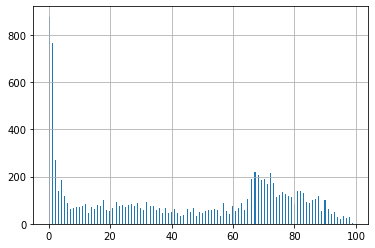

In [11]:
hist = int_df["age_of_patient_at_service"].hist(bins=300)

In [12]:
# https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age
int_df["age_of_patient_Group_customize"] = pd.cut(int_df["age_of_patient_at_service"],\
                 [-1, 1, 4, 12, 19, 39, 59, np.inf],\
                 labels=['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult'])

In [13]:
int_df["age_of_patient_Group_customize"].value_counts(dropna = False)

Senior Adult        4160
Infant              1644
Adult               1429
Middle Age Adult    1042
Child                637
Toddler              597
Teen                 491
Name: age_of_patient_Group_customize, dtype: int64

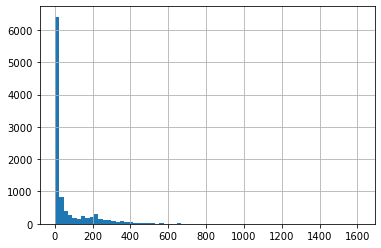

In [14]:
hist = int_df["days_to_claim_submission"].hist(bins=70)

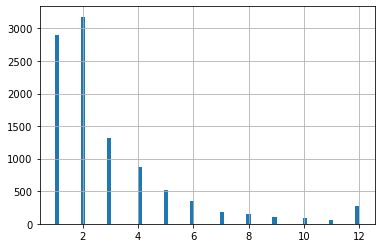

In [15]:
hist = int_df["diagnosis_count"].hist(bins=70)

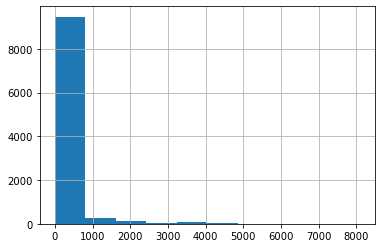

In [16]:
hist = int_df["line_item_charge_amount"].hist(bins=10)

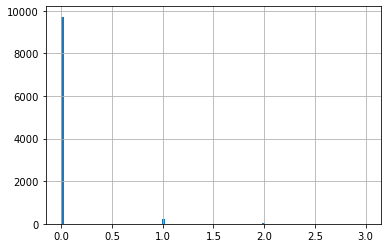

In [17]:
hist = int_df["modifiers_count"].hist(bins=100)

In [18]:
int_df["modifiers_count"].value_counts(dropna = False)

0    9720
1     238
2      40
3       2
Name: modifiers_count, dtype: int64

In [19]:
int_df["service_unit_quantity"].value_counts(dropna = False)

1        9449
2         179
4          73
3          63
150        47
8          29
12         24
9          16
7          16
11         16
6          12
13          9
14          8
20          7
5           7
15          6
25          6
21          4
10          4
16          3
63          2
30          2
24          2
72          1
89          1
64          1
48          1
17          1
167         1
105         1
129         1
18          1
26          1
60          1
45          1
22          1
22500       1
47          1
19          1
Name: service_unit_quantity, dtype: int64

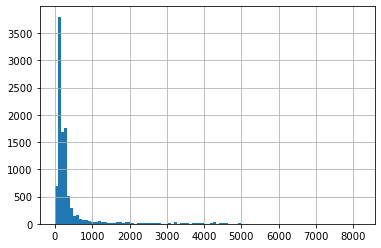

In [20]:
hist = mod_df["claim_level_charge_amount"].hist(bins=100)

### dates

In [21]:
temp = list(set(dataTypeList).difference(set(mod_df.columns.tolist())))
print (temp)
for i in range(len(temp)):
    dataTypeList.remove(temp[i])
    
dates_df =  mod_df[dataTypeList]
print (dates_df.shape)
dates_df.head()

['admission_date', 'discharge_date']
(10000, 2)


,claim_creation_date,service_date
0,2018-11-30,2018-11-25
1,2019-05-15,2019-02-03
2,2018-07-26,2018-07-24
3,2019-06-12,2019-06-09
4,2018-02-07,2018-01-25


In [22]:
missing_zero_values_table(dates_df)


Your selected dataframe has 2 columns and 10000 Rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Type


In [23]:


dates_df["serviceToClaimDays"] = (dates_df['claim_creation_date'] - dates_df['service_date']).dt.days

# Assumption Check

temp = dates_df[dates_df["serviceToClaimDays"] > 365]
print (temp.shape)
print ("serviceToClaimDays min greater than 365 : ", temp["serviceToClaimDays"].min())
print ("serviceToClaimDays max greater than 365 : ",temp["serviceToClaimDays"].max())

dates_df["serviceToClaimDays"] = np.where(dates_df["serviceToClaimDays"] > 365, 365, dates_df["serviceToClaimDays"])

(203, 3)
serviceToClaimDays min greater than 365 :  366
serviceToClaimDays max greater than 365 :  1495


### String data

In [24]:
temp = list(set(strTypeList).difference(set(mod_df.columns.tolist())))
print (temp)
for i in range(len(temp)):
    strTypeList.remove(temp[i])
    
str_df =  mod_df[strTypeList]
print (str_df.shape)
str_df.head()

['related_causes_code', 'subscriber_policy_type', 'supervising_provider', 'drug_code_category', 'prior_authorization_number', 'pat_relationship_wt_insured', 'other_insured_group', 'other_subscriber2_prsn', 'other_payer2', 'procedure_modifier', 'condition_code']
(10000, 30)


,billing_provider,billing_provider_city,billing_provider_postal_code,claim_submitter_id,clia_number,line_item_id,ordering_provider,pat_MRN,patient_StateProvinceCode,patient_city,payer_city,payer_name,payer_postal_code,payer_state_province_code,referring_provider,rendering_provider,_d_diff_ref_rend_provider,_d_more_than_one_cpt_per_claim_per_day,benefits_assignment_certification_indicator,claim_filing_indicator_code,claim_frequency_type_code,facility_code_value,other_payer1,other_subscriber1_prsn,patient_Gender,patient_PostalCode,principalDx_CCSR_Category1,proc_hcpcs_category,subscriber_prsn,denialFlag
0,billing_provider_0,city_92,postal_code_1050,6423,14356,6423_1,ordering_provider_5,11412,state_15,city_92,city_16,payer_80,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,11,NaN,NaN,F,postal_code_765,FAC016,immunization_administration_for_vaccines/toxoids,P,1
1,billing_provider_1,city_92,postal_code_638,17247,14356,17247_2,ordering_provider_12,13292,state_15,city_65,city_16,payer_3,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,22,NaN,NaN,M,postal_code_1509,GEN002,Hospital_observation_services,P,1
2,billing_provider_0,city_92,postal_code_1050,14405,14356,14405_1,ordering_provider_10,13356,state_15,city_71,city_41,payer_31,postal_code_54,state_1,referring_provider_9,rendering_provider_9,0,0,Y,MB,1,11,payer_53,S,M,postal_code_407,DIG010,Office/other_outpatient_services,P,1
3,billing_provider_0,city_92,postal_code_1412,20401,14356,20401_1,ordering_provider_5,11407,state_15,city_92,city_16,payer_3,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,11,NaN,NaN,M,postal_code_1132,INJ041,Office/other_outpatient_services,P,1
4,billing_provider_0,city_92,postal_code_1050,7157,14356,7157_1,ordering_provider_4,13946,state_15,city_92,city_41,payer_31,postal_code_54,state_1,referring_provider_3,rendering_provider_3,0,0,Y,MB,1,11,NaN,NaN,F,postal_code_406,FAC008,Office/other_outpatient_services,P,1


In [25]:
missing_zero_values_table(str_df)

Your selected dataframe has 30 columns and 10000 Rows.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Data Type
other_payer1,5949,59.5,object
other_subscriber1_prsn,5949,59.5,object
rendering_provider,40,0.4,object
ordering_provider,34,0.3,object
referring_provider,16,0.2,object
pat_MRN,3,0.0,object


In [26]:
str_df["billing_provider"].value_counts(dropna = False)

billing_provider_0    8255
billing_provider_1    1743
billing_provider_2       2
Name: billing_provider, dtype: int64

In [27]:
str_df["billing_provider_city"].value_counts(dropna = False)

city_92    9999
city_16       1
Name: billing_provider_city, dtype: int64

In [28]:
str_df["billing_provider_postal_code"].value_counts(dropna = False)

postal_code_1050    5391
postal_code_1412    3118
postal_code_638     1490
postal_code_243        1
Name: billing_provider_postal_code, dtype: int64

In [29]:
str_df["claim_submitter_id"].value_counts(dropna = False)

20541    15
20462    15
20324    14
20227    12
20293    12
20300    12
20199    12
20320    11
14946    11
13197     8
19059     8
20288     8
7904      8
4684      7
13879     7
20570     7
13084     7
20365     7
20349     7
6566      7
15022     7
9107      7
11495     6
20100     6
6012      6
19795     6
2119      6
3505      6
72        6
10795     6
12311     6
17206     6
8981      6
11486     6
3704      6
7887      6
13218     6
8230      6
20136     6
8992      6
10882     6
20287     6
10668     6
20418     6
5319      6
1498      6
11935     6
15171     6
9413      6
11035     5
20183     5
20325     5
17223     5
20284     5
12031     5
7283      5
3028      5
3024      5
6685      5
20180     5
16120     5
2084      5
15186     5
5815      5
20175     5
20410     5
20374     5
17594     5
20375     5
20074     5
15275     5
4583      5
7658      5
20283     5
17531     5
13533     5
19341     5
7529      5
14923     4
15319     4
15295     4
14817     4
13664     4
2034

In [30]:
str_df["clia_number"].value_counts(dropna = False)

14356    10000
Name: clia_number, dtype: int64

In [31]:
str_df["line_item_id"].value_counts(dropna = False)

20320_2     4
20320_3     4
20320_1     3
20312_1     2
20308_1     2
20430_1     2
20172_4     2
20411_1     2
20322_1     2
20369_1     2
20300_6     2
20293_4     2
20541_3     2
20417_1     2
20179_1     2
20373_1     2
20366_1     2
20341_1     2
20324_2     2
20541_4     2
20199_1     2
20541_2     2
20293_1     2
20349_1     2
20284_4     2
20387_1     2
20199_4     2
20415_1     2
20132_2     2
20394_1     2
20109_1     2
20236_2     2
20410_1     2
20400_1     2
20293_5     2
20393_1     2
20137_3     2
20324_4     2
20227_5     2
20227_1     2
20109_2     2
20351_2     2
20522_1     2
20409_1     2
20035_1     2
20338_1     2
20398_1     2
20389_1     2
20242_2     2
20100_2     2
20296_1     2
20334_1     2
20462_4     2
20300_5     2
20381_1     2
20349_3     2
20037_1     2
20372_1     2
20343_1     2
20013_1     2
20324_6     2
20283_4     2
20122_1     2
20385_2     2
20317_2     2
20192_2     2
20324_1     2
20423_1     2
20541_6     2
20397_1     2
20462_2     2
20541_

In [32]:
str_df["ordering_provider"].value_counts(dropna = False)

ordering_provider_4     2174
ordering_provider_3     1589
ordering_provider_5     1179
ordering_provider_1      747
ordering_provider_12     741
ordering_provider_6      680
ordering_provider_7      546
ordering_provider_2      402
ordering_provider_8      355
ordering_provider_10     199
ordering_provider_14     189
ordering_provider_18     171
ordering_provider_11     125
ordering_provider_15     116
ordering_provider_9      115
ordering_provider_17     112
ordering_provider_16     109
ordering_provider_0       94
ordering_provider_19      82
ordering_provider_21      54
ordering_provider_20      45
ordering_provider_22      34
NaN                       34
ordering_provider_28      27
ordering_provider_30      18
ordering_provider_24      15
ordering_provider_23      14
ordering_provider_13      11
ordering_provider_29       5
ordering_provider_26       4
ordering_provider_32       4
ordering_provider_25       3
ordering_provider_27       3
ordering_provider_34       2
ordering_provi

In [33]:
str_df["pat_MRN"].value_counts(dropna = False)

11779.0    47
11131.0    39
11182.0    37
10216.0    35
13520.0    31
12889.0    28
11825.0    27
10161.0    27
13268.0    25
10030.0    25
11551.0    25
13853.0    24
13187.0    24
12039.0    24
12080.0    23
11247.0    23
10059.0    22
12151.0    21
12596.0    21
12035.0    21
10179.0    21
12850.0    21
11305.0    21
10218.0    20
10774.0    19
12931.0    19
11342.0    19
13997.0    18
10307.0    18
12593.0    18
12266.0    18
10704.0    18
13490.0    17
12516.0    17
11685.0    17
11668.0    17
10283.0    17
11523.0    17
11412.0    17
11302.0    17
12309.0    17
10526.0    17
11604.0    17
13524.0    17
12739.0    17
11820.0    17
10805.0    17
12852.0    16
10263.0    16
13916.0    16
10507.0    16
11737.0    16
12746.0    16
12664.0    16
12132.0    16
12357.0    16
13630.0    16
12569.0    16
13872.0    15
10316.0    15
11483.0    15
10515.0    15
13880.0    15
12755.0    15
13369.0    15
11695.0    15
10162.0    14
13565.0    14
13609.0    14
11499.0    14
10932.0    14
13190.

In [34]:
str_df["patient_city"].value_counts(dropna = False)

city_92     5818
city_71     1764
city_65      467
city_49      356
city_9       270
city_52      237
city_73      139
city_78      124
city_77      109
city_76       93
city_11       89
city_48       86
city_30       66
city_26       51
city_96       49
city_6        44
city_109      26
city_28       25
city_87       21
city_89       11
city_70        9
city_8         9
city_20        8
city_46        8
city_13        8
city_59        7
city_61        7
city_44        7
city_15        6
city_90        6
city_91        5
city_12        5
city_98        5
city_43        5
city_32        4
city_107       4
city_66        3
city_83        3
city_25        2
city_75        2
city_72        2
city_7         2
city_53        2
city_10        2
city_36        2
city_33        2
city_112       2
city_38        2
city_104       2
city_39        2
city_37        2
city_69        2
city_22        1
city_79        1
city_63        1
city_62        1
city_14        1
city_24        1
city_95       

In [35]:
str_df["payer_city"].value_counts(dropna = False)

city_16     5655
city_41     3711
city_57      190
city_101     143
city_3       127
city_35       72
city_84       51
city_17       35
city_51        5
city_64        4
city_58        2
city_18        2
city_31        2
city_50        1
Name: payer_city, dtype: int64

In [36]:
str_df["payer_postal_code"].value_counts(dropna = False)

postal_code_98      5652
postal_code_54      3711
postal_code_1342     175
postal_code_478      143
postal_code_1142     126
postal_code_550       65
postal_code_146       51
postal_code_737       35
postal_code_1348       8
postal_code_746        7
postal_code_481        5
postal_code_684        5
postal_code_551        3
postal_code_583        2
postal_code_369        2
postal_code_559        2
postal_code_1219       2
postal_code_834        1
postal_code_1003       1
postal_code_20         1
postal_code_69         1
postal_code_437        1
postal_code_1571       1
Name: payer_postal_code, dtype: int64

In [37]:
str_df["referring_provider"].value_counts(dropna = False)

referring_provider_3     2672
referring_provider_2     2164
referring_provider_4     1824
referring_provider_1      721
referring_provider_5      674
referring_provider_6      345
referring_provider_9      216
referring_provider_13     215
referring_provider_16     194
referring_provider_15     123
referring_provider_14     123
referring_provider_8      120
referring_provider_0      118
referring_provider_10     106
referring_provider_7       64
referring_provider_19      57
referring_provider_17      47
referring_provider_21      37
referring_provider_20      30
referring_provider_18      25
referring_provider_11      24
referring_provider_23      18
NaN                        16
referring_provider_22      14
referring_provider_12      12
referring_provider_24      10
referring_provider_32       6
referring_provider_31       6
referring_provider_26       4
referring_provider_27       3
referring_provider_25       3
referring_provider_36       3
referring_provider_28       2
referring_

In [38]:
str_df["rendering_provider"].value_counts(dropna = False)

rendering_provider_3     2659
rendering_provider_2     2154
rendering_provider_4     1809
rendering_provider_1      717
rendering_provider_5      673
rendering_provider_6      344
rendering_provider_9      201
rendering_provider_13     192
rendering_provider_16     166
rendering_provider_8      116
rendering_provider_14     116
rendering_provider_15     110
rendering_provider_10     106
rendering_provider_0       95
rendering_provider_24      91
rendering_provider_17      64
rendering_provider_7       59
rendering_provider_20      55
rendering_provider_18      45
NaN                        40
rendering_provider_22      34
rendering_provider_21      30
rendering_provider_25      29
rendering_provider_19      25
rendering_provider_11      23
rendering_provider_23      14
rendering_provider_12      11
rendering_provider_29       5
rendering_provider_27       4
rendering_provider_28       3
rendering_provider_26       2
rendering_provider_37       2
rendering_provider_32       1
rendering_

In [39]:
str_df["_d_diff_ref_rend_provider"].value_counts(dropna = False)

0    9773
1     227
Name: _d_diff_ref_rend_provider, dtype: int64

In [40]:
str_df["_d_more_than_one_cpt_per_claim_per_day"].value_counts(dropna = False)

0    9645
1     355
Name: _d_more_than_one_cpt_per_claim_per_day, dtype: int64

In [41]:
str_df["benefits_assignment_certification_indicator"].value_counts(dropna = False)

Y    9973
N      25
W       2
Name: benefits_assignment_certification_indicator, dtype: int64

In [42]:
str_df["claim_filing_indicator_code"].value_counts(dropna = False) 

MC    5653
MB    3719
CI     576
OF      51
BL       1
Name: claim_filing_indicator_code, dtype: int64

In [43]:
str_df["claim_frequency_type_code"].value_counts(dropna = False)

1    9856
7     144
Name: claim_frequency_type_code, dtype: int64

In [44]:
str_df["facility_code_value"].value_counts(dropna = False)

11    7783
22     764
21     570
23     493
32     181
31     154
2       50
12       3
19       1
13       1
Name: facility_code_value, dtype: int64

In [45]:
str_df["other_payer1"].value_counts(dropna = False)

NaN          5949
payer_96      603
payer_80      573
payer_100     461
payer_22      395
payer_31      273
payer_33      210
payer_9       195
payer_67      149
payer_42      145
payer_32      113
payer_70       70
payer_3        65
payer_92       59
payer_47       57
payer_55       46
payer_103      44
payer_45       39
payer_69       39
payer_34       34
payer_0        30
payer_8        28
payer_40       27
payer_77       25
payer_16       22
payer_64       22
payer_63       20
payer_68       19
payer_38       19
payer_49       18
payer_18       16
payer_53       15
payer_25       14
payer_109      13
payer_78       12
payer_39       11
payer_65       11
payer_48       11
payer_14       11
payer_37       10
payer_54        9
payer_87        7
payer_20        7
payer_6         7
payer_97        7
payer_81        6
payer_66        6
payer_76        5
payer_106       4
payer_85        4
payer_28        4
payer_94        4
payer_36        4
payer_4         3
payer_56        3
payer_102 

In [46]:
str_df["other_subscriber1_prsn"].value_counts(dropna = False)

NaN    5949
S      3453
P       598
Name: other_subscriber1_prsn, dtype: int64

In [47]:
df_raw["pat_relationship_wt_insured"].value_counts(dropna = False)

NaN    9805
19      142
01       46
G8        7
Name: pat_relationship_wt_insured, dtype: int64

In [48]:
str_df["patient_Gender"].value_counts(dropna = False)

F    5927
M    4073
Name: patient_Gender, dtype: int64

In [51]:
str_df["subscriber_prsn"].value_counts(dropna = False)

P    9402
S     598
Name: subscriber_prsn, dtype: int64

In [52]:
str_df["denialFlag"].value_counts(dropna = False)

0    7000
1    3000
Name: denialFlag, dtype: int64

In [53]:
str_df["payer_state_province_code"].value_counts(dropna = False)

state_15    5656
state_1     3873
state_5      190
state_18     143
state_12      72
state_16      51
state_7        9
state_17       2
state_2        2
state_6        2
Name: payer_state_province_code, dtype: int64

In [ ]:
###################################################################################################

### comparing with denialFlag

In [55]:

# change to the required column for analysis
col_name = "rendering_provider"


df_raw['denialFlag_STR'] = ['Denied' if x == 1 else 'Approved'  for x in df_raw['denialFlag']]

state_office = df_raw.groupby([ col_name, 'denialFlag_STR'])\
                        .agg({'denialFlag_STR':'count'})
state_pcts= pd.DataFrame(state_office.groupby(level=0).apply(lambda x : 100 * x / float(x.sum())))
state_pcts.columns = [col_name+"%"]

state_pcts = state_pcts.reset_index()
# state_pcts.head()

state_office.columns =  [col_name+"_count"]

state_office_concat = pd.concat([state_office.reset_index() , state_pcts[col_name+"%"]], axis = 1) 
# state_office_concat.head()

temp_list = state_office_concat[(state_office_concat['denialFlag_STR'] == "Denied") & \
                       (state_office_concat[col_name+'%'] > 30) &\
                        (state_office_concat[col_name+"_count"] > 20)].\
                            sort_values(col_name+'%', ascending=False)[col_name].tolist()

state_office_concat[(state_office_concat[col_name].isin(temp_list))]

,rendering_provider,denialFlag_STR,rendering_provider_count,rendering_provider%
0,rendering_provider_0,Approved,58,61.052632
1,rendering_provider_0,Denied,37,38.947368
18,rendering_provider_17,Approved,35,54.687500
19,rendering_provider_17,Denied,29,45.312500
28,rendering_provider_21,Approved,8,26.666667
29,rendering_provider_21,Denied,22,73.333333
34,rendering_provider_24,Approved,54,59.340659
35,rendering_provider_24,Denied,37,40.659341
36,rendering_provider_25,Denied,29,100.000000
43,rendering_provider_3,Approved,1799,67.657014


In [56]:
#################################################################################################

### Hypothesis Testing

In [58]:
from scipy import stats
from scipy.stats import friedmanchisquare

In [60]:
stat, p = stats.kruskal(df_raw["age_of_patient_at_service"], str_df["denialFlag"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=11980.249, p=0.000
Different distributions (reject H0)


In [61]:
stat, p = stats.kruskal(df_raw["age_of_patient_at_service"],df_raw["claim_level_charge_amount"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=13274.342, p=0.000
Different distributions (reject H0)


In [62]:
stat, p = friedmanchisquare( str_df["denialFlag"],df_raw["age_of_patient_at_service"], df_raw["claim_level_charge_amount"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=18668.787, p=0.000
Different distributions (reject H0)
